In [16]:
 ## Accessing file in other working directory using above same comman
    
import os # <-- package to work with files and connections in the operating system

os.getcwd() #<-- gets current working directory
os.chdir("D:\Data Camp\Files\Course5") #<-- changes the current working directory

import pandas as pd
import matplotlib.pyplot as plt

In [17]:
### 1) INTRODUCTION

## Many file types we can import data from such as 
    # excel spreadsheets (*.xlxs)
    # SAS/ STATA files - statistical softwares 
                    #  SAS - Statistical Analysis System used in business analytics and biostatistics for its: 
                            # - Advanced Analytics 
                            # - Multivariate analysis
                            # - Business Intelligence
                            # - Data management 
                            # - Predictive Analysis
                            # - Standard for computational analysis
                            # - Most common SAS Files extensions - *.SAS7BDAT (dataset files) and *.SAS7BCAT  (catalog files)
                            # Needs a context manager initialization via sas7bdat function from  SAS7BDAT package 
                            
                            
                    #   STATA - 'Statics' + 'Data' ; used in academic social sciences research such as economics, epidimiology
                            # Most common extention *.dta
                            # can be imported using pandas without needing to intialize a context manager - pd.read_stata()
                            
    # HDF5 files 
        # Heirenrchial Data Format version 5
        # Standard for storing large quantities of numerical data
        # Datasets in hundreds of gigabytes and terabytes
        # HDF5 can scale upto exabytes
        # needs to import package h5py and use f5py.File() function
        
    # Matlab files
        # Numerically short for Matrix Laboratory
        # Industry standard in disciplines of engineering and science 
        # due to its powerful linear algebra and matrix capabilities
        # Extension : *.mat files
        # Data imported via scypy library functions - scipy.io.loadmat() --- read .mat files
                                                #   - scipy.io.savemat() --- write .mat files
        # .mat file is the collection of objects/ variables in the workspace of matlab from the .mat file
    
## Pickled file types - 
    # a native file type fo python
    # Concept of pickling a file arises from the following :
        # There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. 
        # If you want your files to be human readable, you may want to save them as text files in a clever manner. 
        # JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.
        # However, if you merely want to be able to import them into Python, you can serialize them. 
        # Serialize = converting the object into a sequence of bytes, or a bytestream.

        # Example code to import pickle file (dont execute)
            # Import pickle package
                import pickle

            # Open pickle file and load data: d
                with open('data.pkl','rb') as file:  #<-- 'rb' specifies it is s read only for a binary file
                    d = pickle.load(file)

            # Print d
                print(d)

            # Print datatype of d
                print(type(d)) 

### 2) WORKING WITH EXCEL FILES using pd.ExcelFile 

### 3) WORKING WITH SAS/STATA files using pandas

### 4) Working with HDF5 files

### 5) Working with MATLAB files

IndentationError: unexpected indent (<ipython-input-17-5ea7dd206547>, line 35)

In [18]:
## 2) Working with excel sheets (*xlxs)

        # Step 1 : importing excel file - using pd.ExcelFile() 
        # Step 2 - Listing sheets in Excel files using attribute .sheet_names
    
    # Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xl
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)  

['2002', '2004']


In [19]:
        # Step 3 - Method parse() -- importing any given sheet of your loaded .xlsx file as a DataFrame passing the sheet name or index
    
# You'll be able to do so by specifying either the sheet's name or its index.

# Load a sheet '2004' into a DataFrame by name: df1
df1 = xls.parse('2004') #<-- alternatively xls.parse(1) could have been used using index

# Print the head of the DataFrame df1
print(df1.head()) 

# Load a sheet '2002' into a DataFrame by index: df2
df2 = xls.parse(0)  #<-- alternatively xls.parse('2002') could be used

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


In [20]:
    # Step 4 - Customizing sheet import - Passing additional arguments to Method parse()
            # xls.parse(---, usecols=   , skiprows=  , names=  )
            # --- - specify sheet name as string or index ; here 0 and 1 for first and second sheet
            # usecols = [0,..] specifies a list of coloumns to parse ; here only 1st coloumn in second sheet importing
            # skiprows = [0,..] ; specifies list of rows to o skip by indexes; here the first row (index = 0)
            # names = ['','',...]; renames the coloumns in this order of list of strings
            
# Parse the first sheet by index, skip the first row,  and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet, skip the first row and rename the column: df2
df2 = xls.parse(1, usecols = [0], skiprows= [0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


In [21]:
## 3) Working with SAS FILES

# Step 1 : import SAS7BDAT function from sas7bdat package  

from sas7bdat import SAS7BDAT 

# Step 2 : Bind the variable file to a connection to the file 'sales.sas7bdat' in a context manager

with SAS7BDAT('sales.sas7bdat') as file : #<-- need to install this
    
    #Step 3 : Within this context we can apply the method .to_data_frame() and store in variable df_sas 
    df_sas = file.to_data_frame() 
    
    print(df_sas)

      YEAR           P            S
0   1950.0   12.900000   181.899994
1   1951.0   11.900000   245.000000
2   1952.0   10.700000   250.199997
3   1953.0   11.300000   265.899994
4   1954.0   11.200000   248.500000
5   1955.0   15.100000   278.399994
6   1956.0   16.200001   307.299988
7   1957.0   15.400000   320.000000
8   1958.0   12.700000   305.299988
9   1959.0   16.299999   338.000000
10  1960.0   15.200000   345.700012
11  1961.0   15.300000   356.399994
12  1962.0   17.700001   389.399994
13  1963.0   19.500000   412.700012
14  1964.0   23.200001   443.100006
15  1965.0   27.500000   492.200012
16  1966.0   30.900000   554.200012
17  1967.0   29.000000   575.400024
18  1968.0   32.099998   631.900024
19  1969.0   33.200001   694.599976
20  1970.0   28.600000   708.799988
21  1971.0   31.000000   751.099976
22  1972.0   36.500000   849.500000
23  1973.0   48.099998  1017.200012
24  1974.0   58.700001  1060.599976
25  1975.0   49.099998  1065.199951
26  1976.0   64.500000  1203

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


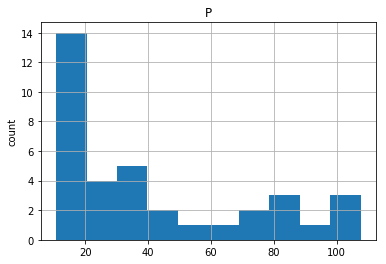

In [22]:
# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8   ...    disa16  disa17  disa18  disa19  disa20  disa21  \
0   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
1   0.56    0.0   ...       0.0     0.4     0.0    0.61    0.00     0.0   
2   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
3   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
4   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.05     0.0   

   disa22  disa23  disa24  disa25  
0    0.00    0.02    0.00    0.00  
1    0.99    0.98   

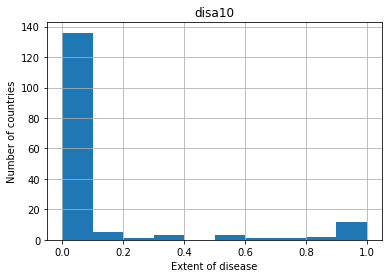

In [23]:
## 3) Working with STATA FILES - *dta

# can be imported using pandas without needing to intialize a context manager - pd.read_stata() function

import pandas as pd

df = pd.read_stata('disarea.dta') 

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


In [33]:
### 4) Working with HDF5 files

import numpy as np

#needs to import package h5py
import h5py

#use h5py.File() function to import file
filename = 'L-L1_LOSC_4_V1-1126259446-32.hdf5'
data = h5py.File(filename, 'r')  # 'r' is to read
print(type(data))

<class 'h5py._hl.files.File'>


In [34]:
# We can explore the heirechial structure of these HDF5 files as we would see that of a dictionary using method .keys()

    #Step 1 - Find out the HDF5 main groups (keys of the file)
    

for key in data.keys():
    print(key)  #<-- each of these is an HDF group, equivalent to directories
    
# In this file the data contains meta group - giving meta data; quality - quality of data ; strain - give actal inferometer of laser data collected of interest

meta
quality
strain


In [35]:
# If we knew the groups like above we can access the data separately

print(type(data['meta'])) #<-- HDF group

#However if we dint knew the exact groups, we can access it easily explore using the heirerchial nature of the file structure

<class 'h5py._hl.group.Group'>


In [38]:
   #Step 2 - Explore the group of interest - find its keys - : here example 'meta' group - use method .keys()

# For example let's say we want to  find what type of meta data there is, we can easil print it out using method .keys()

for key in data['meta'].keys():
    print(key)

Description
DescriptionURL
Detector
Duration
GPSstart
Observatory
Type
UTCstart


In [39]:
    #Step 3 - Knowing the keys we can then find out any meta data of interest : for example description and detector
            # -- use method attribute.value
    
print(data['meta']['Description'].value, data['meta']['Detector'].value )

# <-- We can see that the data is the strain data time series from LIGO, and the detector used in L1

b'Strain data time series from LIGO' b'L1'


Strain


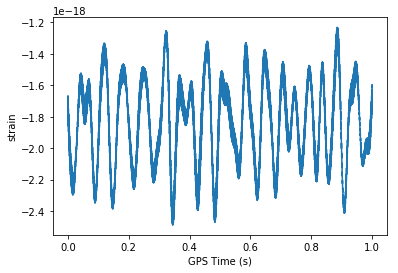

In [40]:
   #Step 4 - Now we can look at the actual data which from description above in meta file in in strain group and repeat above steps
    
# Get the HDF5 group 'strain': group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

In [41]:
    ### 5) WORKING WITH MATLAB FILES

# need to use standard scipy.io.loadmat() from scipy package to import .mat files

import scipy.io

filename = "ja_data2.mat"  #<-- required file in the working dictionary

mat = scipy.io.loadmat(filename)
print(type(mat)) #<--- it tells us that object imported is a dcitionary

#<-- How dictionaries are related to matlab workspace is straightforward:
    # <-- keys : MATLAB variable names
    # <-- values : object assigned to above variables

<class 'dict'>


In [52]:
for key in mat.keys(): # <-- getting the list of all matlab variables
    print(key)
    
    


__header__
__version__
__globals__
rfpCyt
rfpNuc
cfpNuc
cfpCyt
yfpNuc
yfpCyt
CYratioCyt


In [53]:
#or
    
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])


In [48]:
print(type(mat['CYratioCyt'])) # <-- variable CYratioCyt contains a numpy  array

<class 'numpy.ndarray'>


In [49]:
# <-- we can further get the shape of the rfpCyt numpy array using np.shape() function

print(np.shape(mat['CYratioCyt'])) #<-- so its a 200 row by 137 coloumn matlab variable

(200, 137)


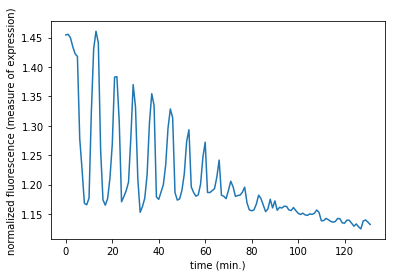

In [50]:
# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()